In [41]:
import os
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
%matplotlib inline

In [25]:
train = pd.read_csv('./data/train.csv')

RX_train = pickle.load(open("./pickle/RX_train.pkl", 'rb'))

In [26]:
correct = train[y_train == RX_train]  # 정답
wrong = train[y_train != RX_train]   # 오답

## 개수 비교

In [27]:
print(train.shape)
print(correct.shape)
print(wrong.shape)

(2048, 787)
(1703, 787)
(345, 787)


## 표 비교

train 데이터와 잘못 인식된 wrong 데이터의 표를 보고 비교합니다.  
train데이터는 2048개이고 틀린 결과는 345개가 됩니다.

In [28]:
train

,id,digit,letter,0,1,2,3,4,5,6,...,774,775,776,777,778,779,780,781,782,783
0,1,5,L,1,1,1,4,3,0,0,...,2,1,0,1,2,4,4,4,3,4
1,2,0,B,0,4,0,0,4,1,1,...,0,3,0,1,4,1,4,2,1,2
2,3,4,L,1,1,2,2,1,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,9,D,1,2,0,2,0,4,0,...,3,3,2,0,1,4,0,0,1,1
4,5,6,A,3,0,2,4,0,3,0,...,4,4,3,2,1,3,4,3,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2043,2044,6,V,2,4,3,4,2,4,4,...,0,2,2,0,0,1,3,1,4,0
2044,2045,1,L,3,2,2,1,1,4,0,...,2,3,4,2,1,2,3,4,1,1
2045,2046,9,A,4,0,4,0,2,4,4,...,2,3,1,1,3,4,2,2,0,0
2046,2047,0,Z,2,3,3,0,3,0,4,...,2,3,1,1,0,4,1,4,3,1


In [29]:
correct.reset_index()

,index,id,digit,letter,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,0,1,5,L,1,1,1,4,3,0,...,2,1,0,1,2,4,4,4,3,4
1,1,2,0,B,0,4,0,0,4,1,...,0,3,0,1,4,1,4,2,1,2
2,2,3,4,L,1,1,2,2,1,1,...,3,3,3,0,2,0,3,0,2,2
3,4,5,6,A,3,0,2,4,0,3,...,4,4,3,2,1,3,4,3,1,2
4,5,6,8,C,4,3,0,3,3,4,...,4,3,0,4,4,4,2,2,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698,2043,2044,6,V,2,4,3,4,2,4,...,0,2,2,0,0,1,3,1,4,0
1699,2044,2045,1,L,3,2,2,1,1,4,...,2,3,4,2,1,2,3,4,1,1
1700,2045,2046,9,A,4,0,4,0,2,4,...,2,3,1,1,3,4,2,2,0,0
1701,2046,2047,0,Z,2,3,3,0,3,0,...,2,3,1,1,0,4,1,4,3,1


In [30]:
wrong.reset_index()

,index,id,digit,letter,0,1,2,3,4,5,...,774,775,776,777,778,779,780,781,782,783
0,3,4,9,D,1,2,0,2,0,4,...,3,3,2,0,1,4,0,0,1,1
1,14,15,9,H,3,2,2,3,0,1,...,4,2,0,0,1,0,0,0,0,2
2,16,17,7,R,1,4,4,3,4,0,...,0,4,1,4,4,0,2,3,4,3
3,17,18,7,A,2,3,0,4,0,0,...,1,2,0,0,1,0,2,2,1,4
4,20,21,5,V,3,1,0,4,0,3,...,0,0,4,2,2,4,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
340,2003,2004,8,L,2,0,0,3,4,1,...,1,1,0,0,3,1,3,4,0,2
341,2014,2015,5,N,1,0,4,3,0,0,...,0,3,1,4,1,1,2,1,1,4
342,2018,2019,1,R,1,0,1,3,4,4,...,4,0,1,4,3,3,1,2,3,1
343,2034,2035,7,T,0,1,1,3,2,2,...,4,4,4,3,4,4,3,2,0,0


## 그래프 비교

In [39]:
train_img = train.drop(['letter','id','digit'],axis=1)
train_label = train[['digit', 'letter']]

train_img = train_img.values.reshape(-1,28,28,1)

In [31]:
wrong_img = wrong.drop(['letter','id','digit'],axis=1)
wrong_label = wrong[['digit', 'letter']]

wrong_img = wrong_img.values.reshape(-1,28,28,1)

In [32]:
correct_img = correct.drop(['letter','id','digit'],axis=1)
correct_label = correct[['digit', 'letter']]

correct_img = correct_img.values.reshape(-1,28,28,1)

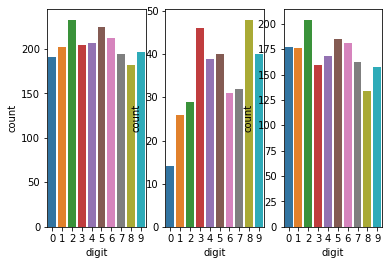

In [35]:
fig, ax = plt.subplots(ncols=3)
sns.countplot(train['digit'], ax=ax[0])
sns.countplot(wrong['digit'], ax=ax[1])
sns.countplot(correct['digit'], ax=ax[2])

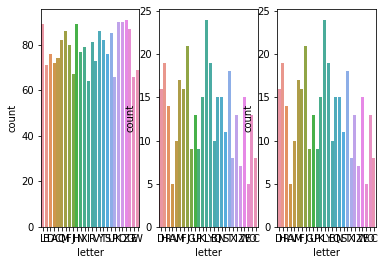

In [38]:
fig, ax = plt.subplots(ncols=3)
sns.countplot(train['letter'], ax=ax[0])
sns.countplot(wrong['letter'], ax=ax[1])
sns.countplot(wrong['letter'], ax=ax[2])

### 원본 이미지

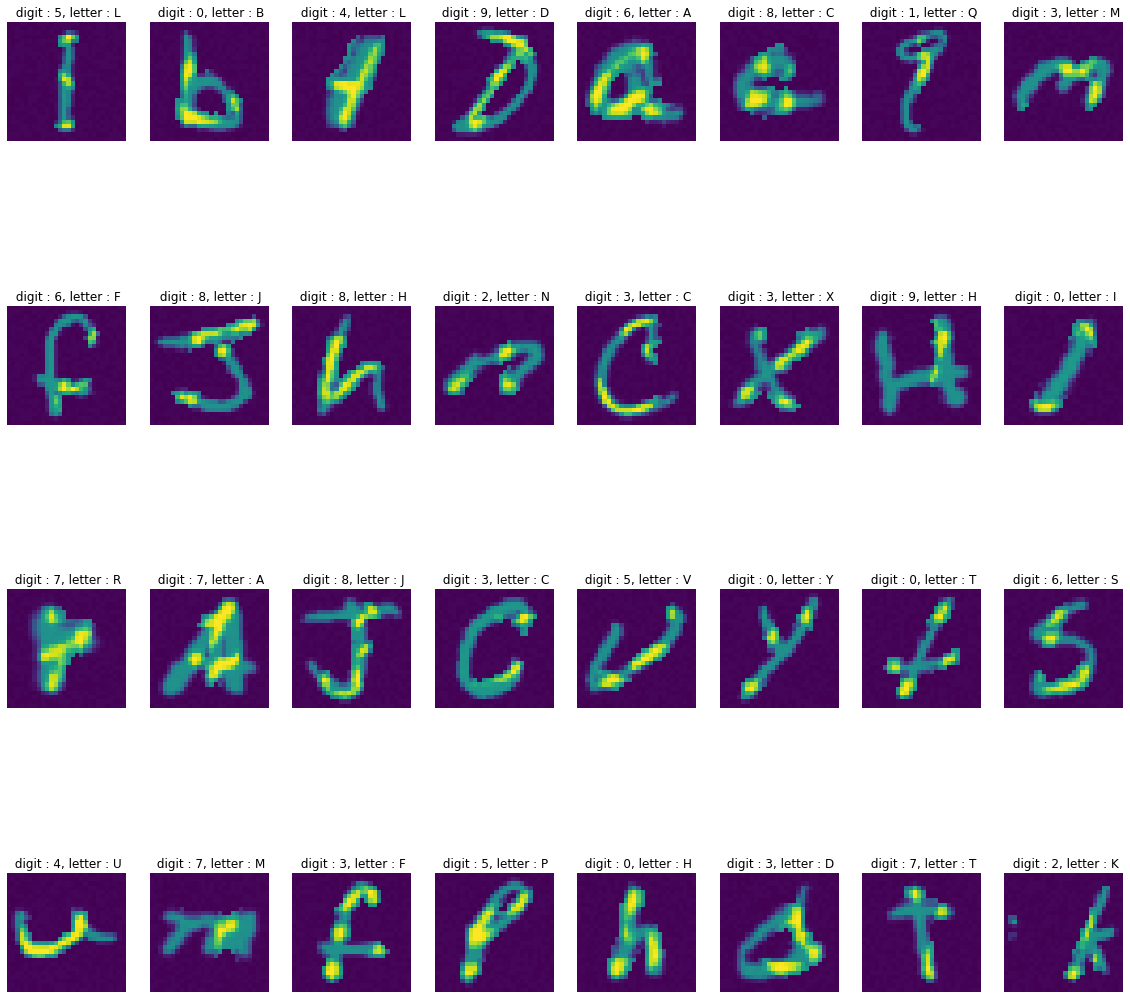

In [42]:
plt.figure(figsize=(20,20))
for idx, (digit, letter) in enumerate(zip(train_label['digit'][:32],train_label['letter'][:32])):
    plt.subplot(4,8,idx+1)
    plt.imshow(tf.squeeze(train_img[idx]))
    title = ' digit : {}, letter : {}'.format(digit, letter)
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

### 오답 이미지

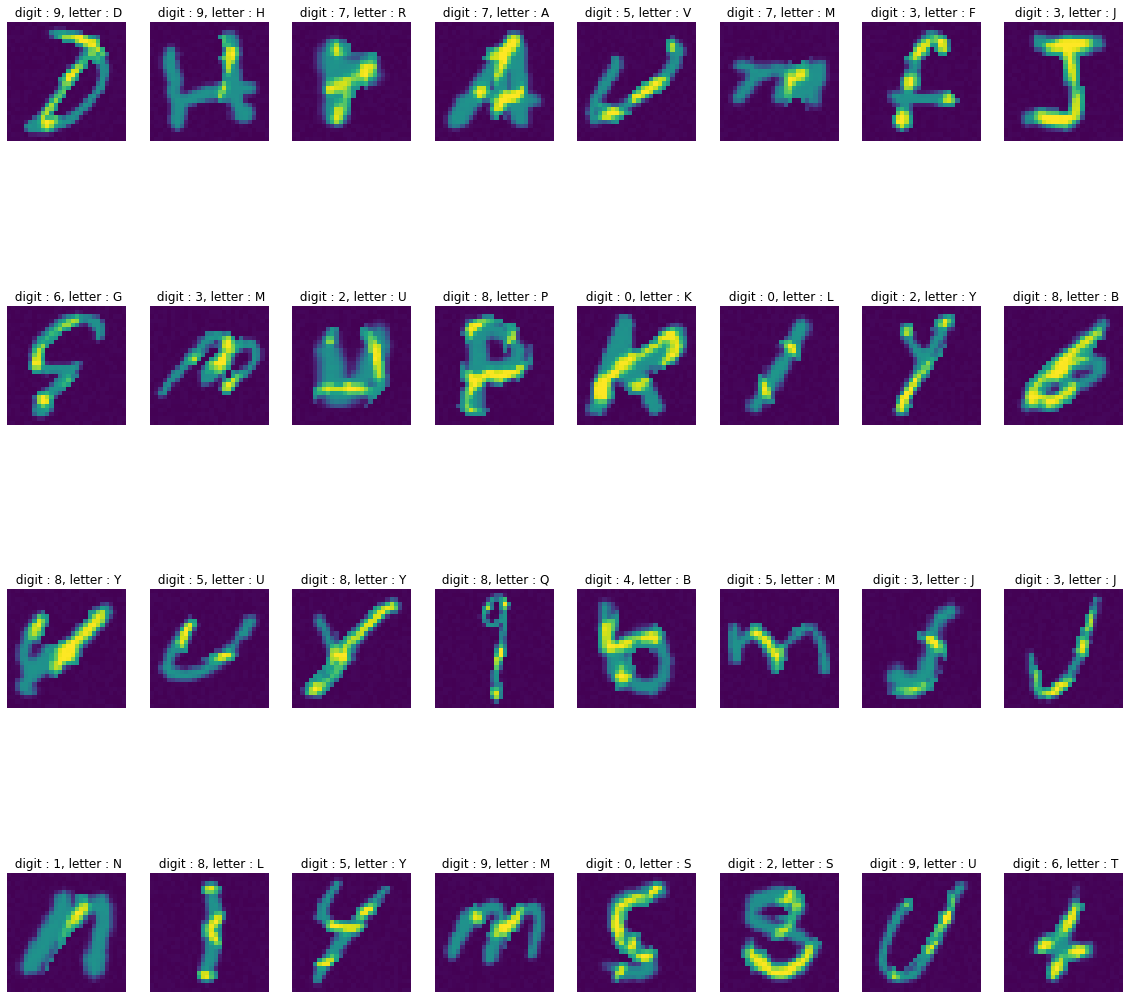

In [43]:
plt.figure(figsize=(20,20))
for idx, (digit, letter) in enumerate(zip(wrong_label['digit'][:32],wrong_label['letter'][:32])):
    plt.subplot(4,8,idx+1)
    plt.imshow(tf.squeeze(wrong_img[idx]))
    title = ' digit : {}, letter : {}'.format(digit, letter)
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')

### 정답 이미지

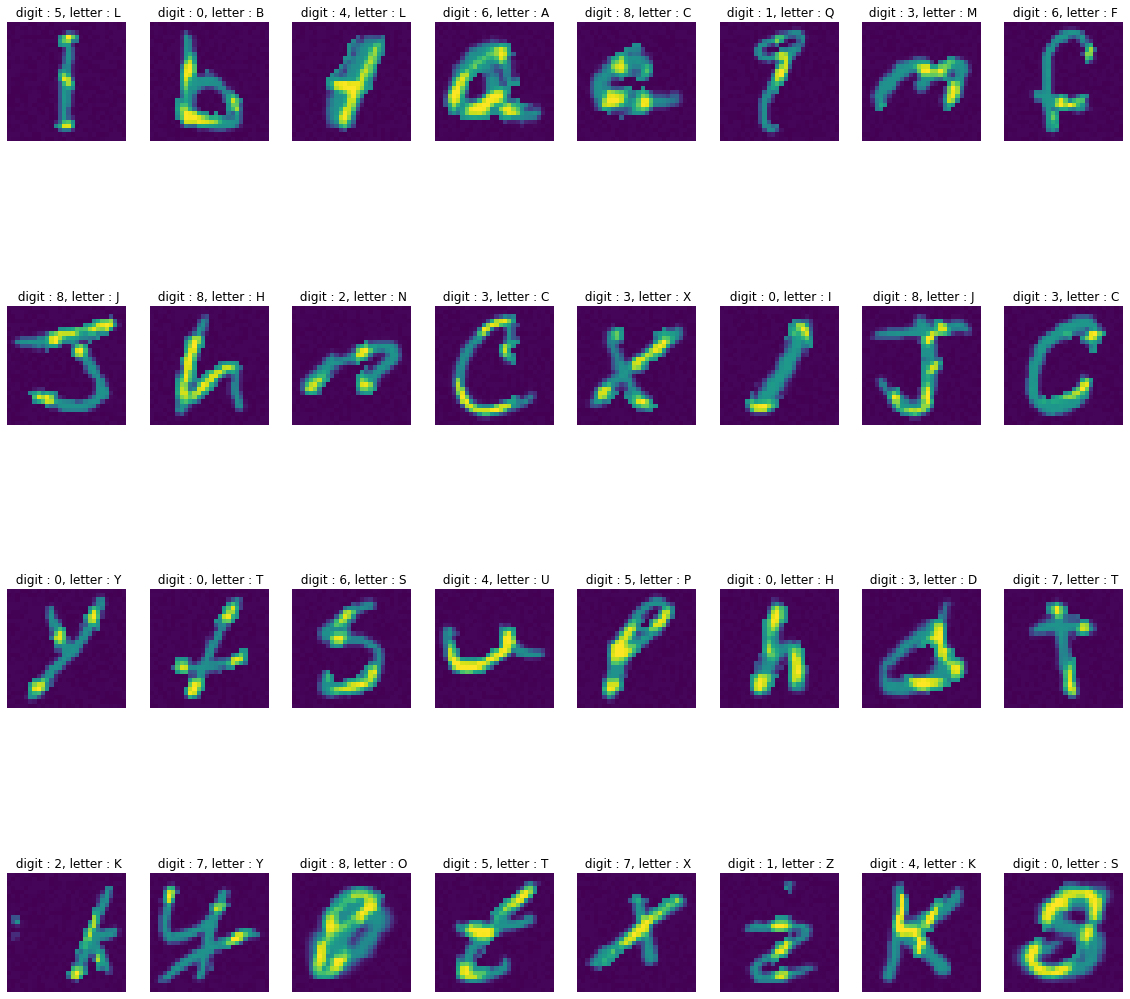

In [44]:
plt.figure(figsize=(20,20))
for idx, (digit, letter) in enumerate(zip(correct_label['digit'][:32],correct_label['letter'][:32])):
    plt.subplot(4,8,idx+1)
    plt.imshow(tf.squeeze(correct_img[idx]))
    title = ' digit : {}, letter : {}'.format(digit, letter)
    plt.title(title, fontdict={'color':'black'})
    plt.axis('off')